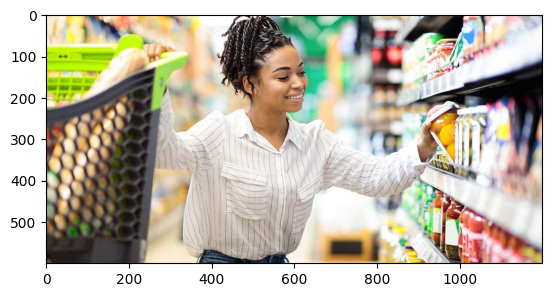

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('consumidor.jpg'))

## Agrupa as reclamações de consumidor (clustering)

- Dados Consumidor.gov.br
O Consumidor.gov.br é um novo serviço público para solução alternativa de conflitos de consumo por meio da internet, que permite a interlocução direta entre consumidores e empresas, fornece ao Estado informações essenciais à elaboração e implementação de políticas públicas de defesa dos consumidores e incentiva a competitividade no mercado pela melhoria da qualidade e do atendimento ao consumidor.

https://dados.mj.gov.br/dataset/reclamacoes-do-consumidor-gov-br

- Neste estudo, através de dados de reclamações do consumidor, o objetivo é agrupar essas reclamações em clusters conforme as características passadas, fazendo uso de machine learning.

- Após o agrupamento pode-se ter informações relevantes tais como características de cada grupo, quantidade de reclamações por grupo, faixa hetária, etc.

In [2]:
# importa bibliotecas
import pandas as pd
from matplotlib.colors import ListedColormap

In [3]:
# carrega arquivo
df_reclama = pd.read_csv('arquivos/basecompleta2023-12.csv', sep=';')

In [4]:
# verifica qtde linhas e colunas
df_reclama.shape

(126060, 30)

In [5]:
# verifica nulos, colunas e tipo de variável
df_reclama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126060 entries, 0 to 126059
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Gestor                  126060 non-null  object 
 1   Canal de Origem         126060 non-null  object 
 2   Região                  126060 non-null  object 
 3   UF                      126060 non-null  object 
 4   Cidade                  126060 non-null  object 
 5   Sexo                    126055 non-null  object 
 6   Faixa Etária            126060 non-null  object 
 7   Ano Abertura            126060 non-null  int64  
 8   Mês Abertura            126060 non-null  int64  
 9   Data Abertura           126060 non-null  object 
 10  Data Resposta           112161 non-null  object 
 11  Data Análise            13725 non-null   object 
 12  Data Recusa             14138 non-null   object 
 13  Data Finalização        126060 non-null  object 
 14  Prazo Resposta      

In [6]:
# reconhece primeiros dados
df_reclama.head(2)

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa
0,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,São Paulo,F,entre 21 a 30 anos,2023,10,16/10/2023,...,Água e Esgoto,Atendimento / SAC,Dificuldade de contato / demora no atendimento,Não comprei / contratei,S,N,Finalizada não avaliada,Não Avaliada,NaN,Improcedente
1,Superintendência de Proteção e Defesa do Consu...,Plataforma Web,NE,BA,Sátiro Dias,M,entre 21 a 30 anos,2023,10,16/10/2023,...,Aéreo,Atendimento / SAC,SAC - Demanda não resolvida / não respondida /...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,Improcedente


In [7]:
# reconhece últimos dados
df_reclama.tail(2)

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa
126058,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,São Paulo,M,entre 31 a 40 anos,2023,12,30/12/2023,...,Aéreo,Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN
126059,Nucleo de Defesa do Consumidor da Defensoria P...,Plataforma Web,SE,RJ,São Gonçalo,F,entre 21 a 30 anos,2023,12,31/12/2023,...,Demais Seguros,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Não comprei / contratei,N,S,Finalizada avaliada,Resolvida,5.0,NaN


In [8]:
# seleciona colunas para estudo
df_reclama = df_reclama[['Região', 'UF', 'Cidade', 'Sexo', 'Faixa Etária', 'Assunto', 'Problema']]

In [9]:
# verifica colunas e dados selecionados
df_reclama.head(3)

,Região,UF,Cidade,Sexo,Faixa Etária,Assunto,Problema
0,SE,SP,São Paulo,F,entre 21 a 30 anos,Água e Esgoto,Dificuldade de contato / demora no atendimento
1,NE,BA,Sátiro Dias,M,entre 21 a 30 anos,Aéreo,SAC - Demanda não resolvida / não respondida /...
2,SE,SP,São Paulo,M,entre 31 a 40 anos,Aplicativo de mobilidade urbana,Serviço não realizado no prazo ou incompleto


In [10]:
# verifica se existe algum nulo
df_reclama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126060 entries, 0 to 126059
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Região        126060 non-null  object
 1   UF            126060 non-null  object
 2   Cidade        126060 non-null  object
 3   Sexo          126055 non-null  object
 4   Faixa Etária  126060 non-null  object
 5   Assunto       126060 non-null  object
 6   Problema      126060 non-null  object
dtypes: object(7)
memory usage: 6.7+ MB


In [11]:
# verifica quantos nulos existem por coluna
df_reclama.isnull().sum()

Região          0
UF              0
Cidade          0
Sexo            5
Faixa Etária    0
Assunto         0
Problema        0
dtype: int64

In [12]:
# apaga as linhas com nulos
df_reclama = df_reclama.dropna(subset='Sexo')